In [1]:
import scanpy as sc
import anndata
import numpy as np
from scipy import sparse
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import scvelo as scv

In [ ]:
import cellrank.kernels._c

In [2]:
from cellrank.tl.kernels import CytoTRACEKernel

2023-05-22 14:53:45.764262: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-05-22 14:53:45.764375: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-05-22 14:53:45.764384: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


ModuleNotFoundError: No module named 'cellrank.tl'

In [2]:
adata=sc.read("../../important_processed_data/5.22_integrate_adata.h5ad")

In [7]:
adata.layers["spliced"] = adata.X
adata.layers["unspliced"] = adata.X
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

computing neighbors


2023-05-22 15:00:52.680999: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-22 15:00:52.799013: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-22 15:00:52.799033: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-05-22 15:00:53.281989: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directo

    finished (0:01:12) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:32:27) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [9]:
from cellrank.kernels import CytoTRACEKernel

ctk = CytoTRACEKernel(adata)

In [13]:
ctk =CytoTRACEKernel(adata).compute_cytotrace()

In [17]:
adata

AnnData object with n_obs × n_vars = 272369 × 62934
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'Sample', 'Project', 'Limb.Atlas', 'Organ', 'Tissue', 'Tissue.Specific.', 'Stage', 'Gene.type', 'Treatment', 'Age', 'Age.In.Detail.', 'Machine', 'Species', 'Isolation.approach', 'Digestion', 'Enzymes', 'Bone.Forming.Methods', 'Data.Source', 'Related.Assay', 'Origin', 'nCount_RNA', 'nFeature_RNA', 'paper_label', 'coarse_label', 'scDblFinder_class', 'short_id', 'temp_cluster', 'batch', 'batch_atlas', 'size_factors', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'new_totals_log', 'anno_level_1', 'anno_level_2', 'anno_level_3', 'anno_level_4', 'anno_level_5', 'mix_level_1', 'mix_level_2', 'merge_id_level3', 'merge_id_level4', 'merge_id_level5', 'cellid', 'leiden_clusters_level_1', 'leiden_clusters_level_2', 'le

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scvelo/plotting/utils.py:869: MatplotlibDeprecationWarning: The draw_all function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use fig.draw_without_rendering() instead.
  cb.draw_all()


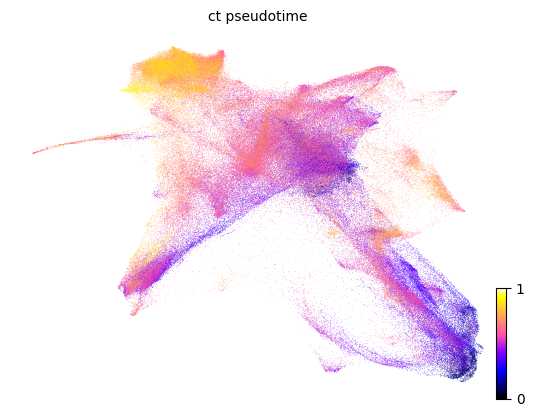

In [18]:
scv.pl.scatter(
    adata,
    c=["ct_pseudotime"],
    basis="X_draw_graph_fa",
    legend_loc="right",
    color_map="gnuplot2",
)

In [20]:
adata.obs.to_csv("../../important_processed_data/5.22_wtintegrate_cytotrace_metadata.csv")

In [ ]:
adata.writ

In [6]:
adata.X[1:4,1:10].toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.54026276,
        0.        , 0.        , 0.54026276, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.5900465 , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.5803124 , 0.        ]], dtype=float32)